# Import Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfTrain = pd.read_csv('titanic_train.csv')
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
listItem = []
for col in dfTrain.columns :
    listItem.append([col, dfTrain[col].dtype, dfTrain[col].isna().sum(), round((dfTrain[col].isna().sum()/len(dfTrain[col])) * 100,2),
                    dfTrain[col].nunique(), list(dfTrain[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,PassengerId,int64,0,0.00,891,"[1, 2]"
1,Survived,int64,0,0.00,2,"[0, 1]"
2,Pclass,int64,0,0.00,3,"[3, 1]"
3,Name,object,0,0.00,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.00,7,"[1, 0]"
7,Parch,int64,0,0.00,7,"[0, 1]"
8,Ticket,object,0,0.00,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.00,248,"[7.25, 71.2833]"


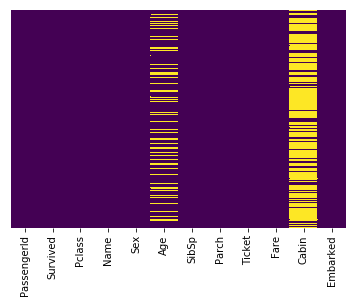

In [6]:
sns.heatmap(dfTrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

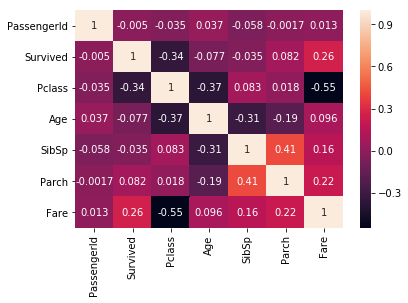

In [7]:
sns.heatmap(dfTrain.corr(),annot=True)

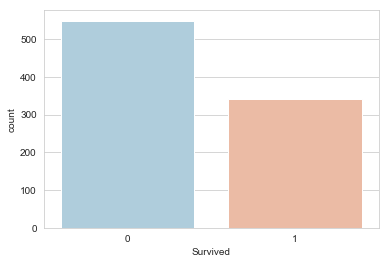

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dfTrain,palette='RdBu_r')

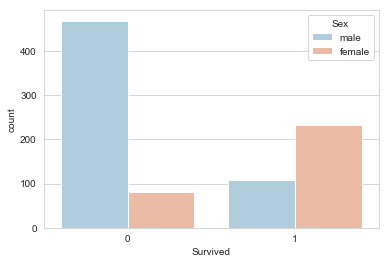

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dfTrain,palette='RdBu_r')

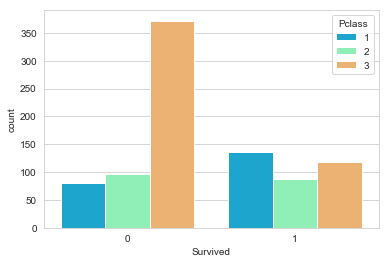

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dfTrain,palette='rainbow')

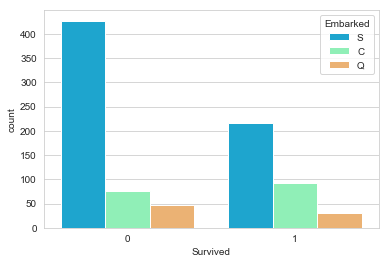

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=dfTrain,palette='rainbow')

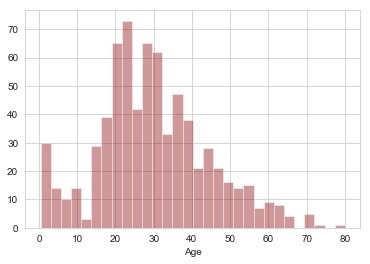

In [12]:
sns.distplot(dfTrain['Age'].dropna(),kde=False,color='darkred',bins=30)

In [13]:
dfTrain[dfTrain['Age'] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


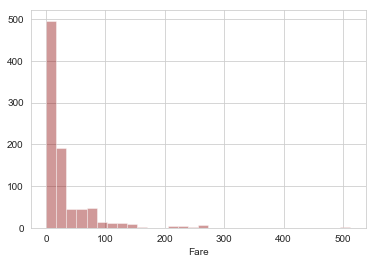

In [14]:
sns.distplot(dfTrain['Fare'].dropna(),kde=False,color='darkred',bins=30)

In [15]:
dfTrain[dfTrain['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


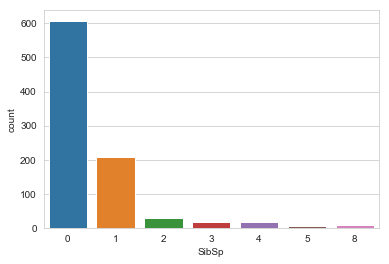

In [16]:
sns.countplot(x='SibSp',data=dfTrain)

In [17]:
dfTrain[dfTrain['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
dfTrain[dfTrain['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


# Dealing With Missing Data

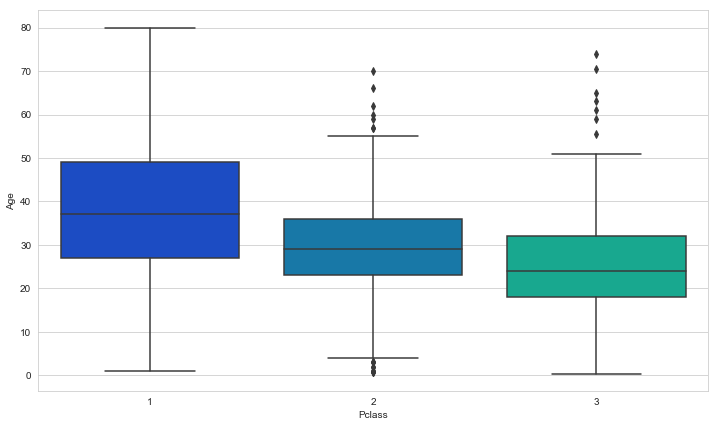

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=dfTrain,palette='winter')

In [20]:
dfTrain.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [21]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [22]:
dfTrain['Age'] = dfTrain[['Age','Pclass']].apply(impute_age,axis=1)

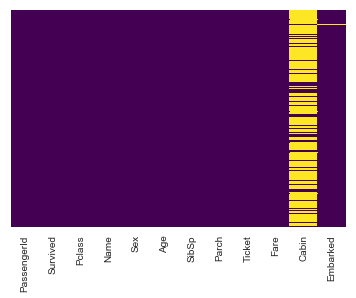

In [23]:
sns.heatmap(dfTrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
dfTrain.drop('Cabin',axis=1,inplace=True)

In [25]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [27]:
dfTrain.dropna(inplace=True)

In [28]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# One Hot Encoding

In [29]:
sex = pd.get_dummies(dfTrain['Sex'], drop_first=True)
embark = pd.get_dummies(dfTrain['Embarked'], drop_first=True)

In [30]:
dfTrain.drop(['Sex', 'Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [31]:
dfTrain = pd.concat([dfTrain,sex,embark],axis=1)

In [32]:
dfTrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dfTrain.drop('Survived',axis=1), 
                                                    dfTrain['Survived'], test_size=0.30, 
                                                    random_state=101)

# Train The Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Feature Importances

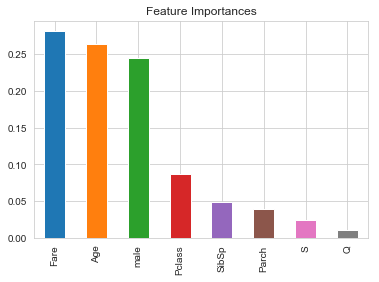

In [37]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')

# Evaluate The Model

### Training Data

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

In [39]:
predictTrain = rfc.predict(X_train)
predictTrain

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [40]:
len(predictTrain)

622

In [41]:
sum(predictTrain)

234

In [42]:
con = pd.DataFrame(data=confusion_matrix(y_train,predictTrain), columns=['P No', 'P Yes'], index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    383      3
A Yes     5    231


In [43]:
print(classification_report(y_train,predictTrain))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.99      0.98      0.98       236

   micro avg       0.99      0.99      0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622



In [44]:
print('Accuracy : ' + str(accuracy_score(y_train,predictTrain)))

Accuracy : 0.9871382636655949


In [45]:
predictProbTrain = rfc.predict_proba(X_train)
predictProbTrain

array([[0.75, 0.25],
       [0.03, 0.97],
       [0.09, 0.91],
       ...,
       [0.35, 0.65],
       [1.  , 0.  ],
       [0.05, 0.95]])

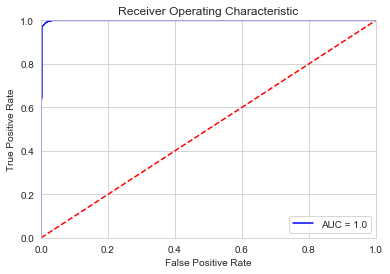

In [46]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
print(len(fpr))
print(len(tpr))
print(len(threshold))

107
107
107


In [48]:
print(fpr[-5:])
print(tpr[-5:])
print(threshold[-5:])

[0.62435233 0.72279793 0.72797927 0.73316062 1.        ]
[1. 1. 1. 1. 1.]
[0.015      0.01       0.00333333 0.002      0.        ]


In [49]:
log_loss(y_train, predictProbTrain[:,1])

0.11588444633756835

### Testing Data

In [50]:
predictTest = rfc.predict(X_test)
predictTest

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [51]:
sum(predictTest)

95

In [52]:
con = pd.DataFrame(data=confusion_matrix(y_test,predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    144     19
A Yes    28     76


In [53]:
print(classification_report(y_test,predictTest))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       163
           1       0.80      0.73      0.76       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [54]:
print('Accuracy : ' + str(accuracy_score(y_test,predictTest)))

Accuracy : 0.8239700374531835


In [55]:
predictProbTest = rfc.predict_proba(X_test)
predictProbTest

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.16      , 0.84      ],
       [0.        , 1.        ],
       [0.86      , 0.14      ],
       [0.79      , 0.21      ],
       [0.15      , 0.85      ],
       [0.66313095, 0.33686905],
       [1.        , 0.        ],
       [0.14      , 0.86      ],
       [0.01833333, 0.98166667],
       [0.03      , 0.97      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.72      , 0.28      ],
       [0.99      , 0.01      ],
       [0.01      , 0.99      ],
       [0.04      , 0.96      ],
       [0.17      , 0.83      ],
       [0.74      , 0.26      ],
       [0.7       , 0.3       ],
       [0.97333333, 0.02666667],
       [0.97      , 0.03      ],
       [0.89      , 0.11      ],
       [1.        , 0.        ],
       [0.71      , 0.29      ],
       [0.43      , 0.57      ],
       [0.37      , 0.63      ],
       [0.57      , 0.43      ],
       [1.        , 0.        ],
       [0.

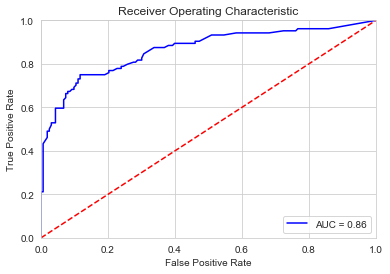

In [56]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
log_loss(y_test, predictProbTest[:,1])

0.899216820959234

# K Fold

In [58]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    logloss = log_loss(y_train,predictProba)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'logloss': logloss
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    logloss = log_loss(y_test,predictProba)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'logloss': logloss
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [59]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

In [60]:
data = dfTrain.drop('Survived',axis=1)
target = dfTrain['Survived']

In [61]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    print(len(X_val), (len(X_train) + len(X_val)))

    # instantiate model
    rfc = RandomForestClassifier(n_estimators=100)

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

89 889
89 889
89 889
89 889
89 889
89 889
89 889
89 889
89 889
88 889


In [62]:
listItem = []

for tr,val in zip(train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['logloss'],val['logloss']])
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Log Loss',
                            'Test Log Loss'])
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.980000,0.786517,0.997696,0.861235,0.978883,0.772623,0.121537,0.472482
1,0.985000,0.752809,0.997028,0.820691,0.983979,0.745582,0.115232,0.950107
2,0.982500,0.764045,0.998013,0.836207,0.981545,0.729013,0.118979,0.818121
3,0.980000,0.797753,0.996765,0.858663,0.978520,0.797523,0.121861,0.823752
4,0.981250,0.853933,0.997141,0.930083,0.980013,0.852065,0.126549,0.333132
5,0.982500,0.853933,0.997673,0.846893,0.981500,0.835209,0.121466,1.481065
6,0.983750,0.876404,0.997801,0.867725,0.982768,0.868361,0.119994,1.122515
7,0.982500,0.842697,0.996874,0.908289,0.981382,0.826752,0.124086,0.359584
8,0.980000,0.786517,0.996726,0.863876,0.978883,0.763066,0.125491,0.439988
9,0.981273,0.795455,0.997639,0.811019,0.980132,0.779018,0.122052,0.550613


In [63]:
dfEvaluate.mean()

Train Accuracy    0.981877
Test Accuracy     0.811006
Train ROC AUC     0.997336
Test ROC AUC      0.860468
Train F1 Score    0.980760
Test F1 Score     0.796921
Train Log Loss    0.121725
Test Log Loss     0.735136
dtype: float64

In [64]:
for rep in validation_errors :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        58
           1       0.67      0.77      0.72        31

   micro avg       0.79      0.79      0.79        89
   macro avg       0.77      0.78      0.77        89
weighted avg       0.80      0.79      0.79        89

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        51
           1       0.72      0.68      0.70        38

   micro avg       0.75      0.75      0.75        89
   macro avg       0.75      0.74      0.75        89
weighted avg       0.75      0.75      0.75        89

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        58
           1       0.69      0.58      0.63        31

   micro avg       0.76      0.76      0.76        89
   macro avg       0.74      0.72      0.73        89
weighted avg       0.76      0.76      0.76        89

              preci